In [109]:
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [110]:
#Disable chrome options
chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications": 2}
chrome_options.add_experimental_option("prefs",prefs)
driver = webdriver.Chrome('C:/Users/Amine/Documents/chromedriver.exe', chrome_options=chrome_options)

<ipython-input-110-abaefab57b14>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('C:/Users/Amine/Documents/chromedriver.exe', chrome_options=chrome_options)


In [111]:
driver.get("https://www.ghorbel-opinion.tn/frontendAssurance.php?fbclid=IwAR2cNZJPjYz28268XltKwH8deiRZmeJIv4gPmYA64mRdlq-H_AClfVfcV9s")

In [115]:
table=driver.find_element_by_id("tblComments")

In [116]:
table

<selenium.webdriver.remote.webelement.WebElement (session="b484e665ff97544e6af9b4eda38cd552", element="2775dcd3-f12f-4e28-8a38-9d2e2ccb86cb")>

In [118]:
note=table.find_elements_by_class_name("style6")

In [119]:
for a in note:
    print(a.text)

4
4
4
3
3
3
1
4
1


In [120]:
ratelist=[]

In [121]:
for a in note:
    ratelist.append(a.text)

In [144]:
ratelist.insert(0,"rate")

In [145]:
ratelist

['rate', '4', '4', '4', '3', '3', '3', '1', '4', '1']

In [123]:
user=table.find_elements_by_tag_name("strong")

In [124]:
for a in user:
    print(a.text)

opinion
yasser
yasser
foufou
foufou
foufou
aymoun
muski
oleg
46


In [125]:
namelist=[]

In [126]:
for a in user:
    namelist.append(a.text)

In [127]:
namelist

['opinion',
 'yasser',
 'yasser',
 'foufou',
 'foufou',
 'foufou',
 'aymoun',
 'muski',
 'oleg',
 '46']

In [128]:
del (namelist[9])

In [142]:
namelist.insert(0,"names")

In [143]:
namelist

['names',
 'opinion',
 'yasser',
 'yasser',
 'foufou',
 'foufou',
 'foufou',
 'aymoun',
 'muski',
 'oleg']

In [146]:
data=list(zip(namelist,ratelist))

In [147]:
data

[('names', 'rate'),
 ('opinion', '4'),
 ('yasser', '4'),
 ('yasser', '4'),
 ('foufou', '3'),
 ('foufou', '3'),
 ('foufou', '3'),
 ('aymoun', '1'),
 ('muski', '4'),
 ('oleg', '1')]

In [148]:
import xlsxwriter

In [149]:
with xlsxwriter.Workbook('rate.xlsx') as workbook:
    worksheet = workbook.add_worksheet()

    for row_num, data in enumerate(data):
        worksheet.write_row(row_num, 0, data)

In [150]:
data=pd.read_excel('rate.xlsx')

In [151]:
data

,names,rate
0,opinion,4
1,yasser,4
2,yasser,4
3,foufou,3
4,foufou,3
5,foufou,3
6,aymoun,1
7,muski,4
8,oleg,1


In [152]:
data.dtypes

names    object
rate      int64
dtype: object

['aymoun', 'foufou', 'muski', 'oleg', 'opinion', 'yasser']
aymoun     1.0
foufou     3.0
muski      4.0
oleg       1.0
opinion    4.0
yasser     4.0
dtype: float64


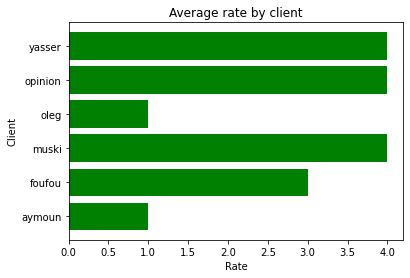

In [178]:
x = ['aymoun', 'foufou', 'muski','oleg','opinion','yasser']
energy = data.groupby('names').rate.sum()/data['names'].value_counts()
print(x)
print(energy)
x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, energy, color='green')
plt.ylabel("Client")
plt.xlabel("Rate")
plt.title("Average rate by client")

plt.yticks(x_pos, x)
plt.show()